-- Pleiades w RV(Epoch J2015.5) -- 

50 <= ra <= 64
18 <= dec <= 30
6.702413 <= parallax <= 8.143322


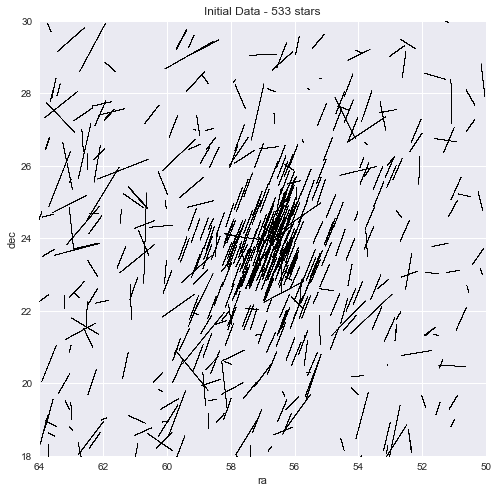

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,69834763780636672,56.309330,0.028709,25.088637,0.018692,19.029027,0.055813,-41.346153,0.041626,0.488959,11.103144,6.704078,0.031810,13.727313,14.589947,12.818868
1,71996090106350208,56.063878,0.048543,29.171192,0.025731,47.385379,0.078068,-37.330409,0.055320,60.496599,0.354755,6.707633,0.050268,10.793491,11.175298,10.269402
2,66003305059450752,60.413108,0.062604,24.499814,0.022878,45.724866,0.104681,-15.406060,0.054975,-3.997040,1.377450,6.710794,0.067905,12.769341,13.481380,11.967682
3,71377000637253504,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,0.915504,6.713325,0.106316,13.343994,14.181078,12.449644
4,65208087570988416,56.876688,0.048537,23.955071,0.024293,93.155275,0.091133,11.189542,0.053262,29.119016,1.555283,6.717703,0.053291,12.689098,13.263436,11.981298


In [1]:
%matplotlib inline

# Initial Querey Paramaters 

#Ra: 03h 47m 24s
#Dec: +24° 07′ 00″
# Ra: 56.85000000 deg  
# 50 <= ra <= 64
# Dec: 24.11666667 deg
# 18 <= dec <= 30 

# Distance = 136 parsecs (d (pc) = 1/parallax (arc sec)
# Tidal Radius = 43 light years - 13.2 pc (1 pc = 3.26156 light years) 

# Radial partition 136 +- 13.2 pc
# (1/((136+13.2)/1000)) 6.702413 <= parallax <= 8.143322 (1/((136-13.2)/1000))

querey_w_rv = 'SELECT TOP 10000 gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, \
gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.radial_velocity, \
gaia.radial_velocity_error, gaia.parallax, gaia.parallax_error, gaia.phot_g_mean_mag, \
gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
FROM gaiadr2.gaia_source as gaia \
WHERE gaia.ra >= 50 and gaia.ra <= 64 and \
gaia.dec <= 30 and gaia.dec >= 18 and \
gaia.parallax >= 6.702413 and gaia.parallax <= 8.143322 and \
gaia.pmra is not null and gaia.pmdec is not null and \
gaia.phot_bp_mean_mag is not null and gaia.phot_rp_mean_mag is not null and \
gaia.phot_g_mean_mag is not null and gaia.radial_velocity is not null'


querey_wo_rv = 'SELECT TOP 10000 gaia.source_id, gaia.ra, gaia.ra_error, gaia.dec, gaia.dec_error, \
gaia.pmra, gaia.pmra_error, gaia.pmdec, gaia.pmdec_error, gaia.parallax, gaia.parallax_error, gaia.phot_g_mean_mag, \
gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
FROM gaiadr2.gaia_source as gaia \
WHERE gaia.ra >= 50 and gaia.ra <= 64 and \
gaia.dec <= 30 and gaia.dec >= 18 and \
gaia.parallax >= 6.702413 and gaia.parallax <= 8.143322 and \
gaia.pmra is not null and gaia.pmdec is not null and \
gaia.phot_bp_mean_mag is not null and gaia.phot_rp_mean_mag is not null and \
gaia.phot_g_mean_mag is not null'

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics as stat
import scipy.stats as st
import random as rand

def pc_ly(x):
    return (1/(float(x)/1000))*3.26156
def mas_deg(x):
    return x*(1/1000)/3600
def abs_mag(x,y):
    return x - (5 * (np.log10(y/10))) 
def color(x,y):
    return [y[i]-x[i] for i in range(len(x))]
def z_score(x,y,z):
    return (x-y)/z
def rad(x):
    return x*math.pi/180
def mult_uncertainty(x,dx,y,dy,z,dz):
    return np.sqrt((dx/x)**2+(dy/y)**2+(dz/z)**2)
def power_uncertainty(x,dx,n):
    return np.absolute(n)*(dx/np.absolute(x))

pleia = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Pleiades-Open-Cluster/pleia_w_rv.csv')

print('-- Pleiades w RV(Epoch J2015.5) -- ')
print()
print('50 <= ra <= 64\n18 <= dec <= 30\n6.702413 <= parallax <= 8.143322')

ra0, dec0 = pleia['ra'], pleia['dec'] 
pmra, pmdec = mas_deg(pleia['pmra']), mas_deg(pleia['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([64,50])
plt.ylim([18,30])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Initial Data - {} stars'.format(len(pleia)))
for i in range(len(pleia)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
pleia.head()

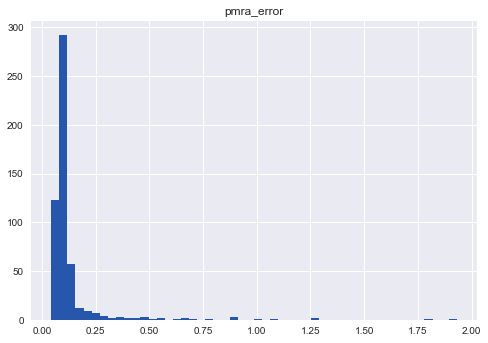

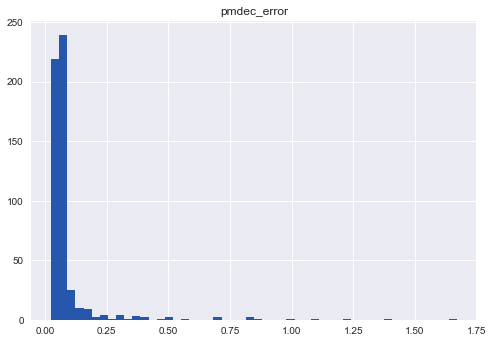

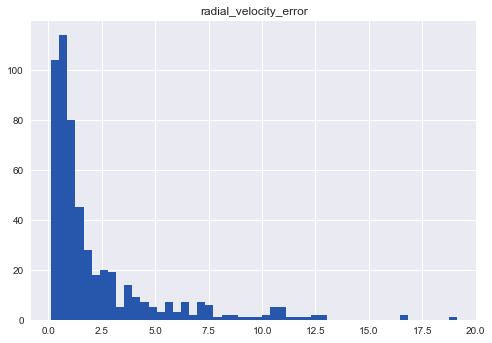

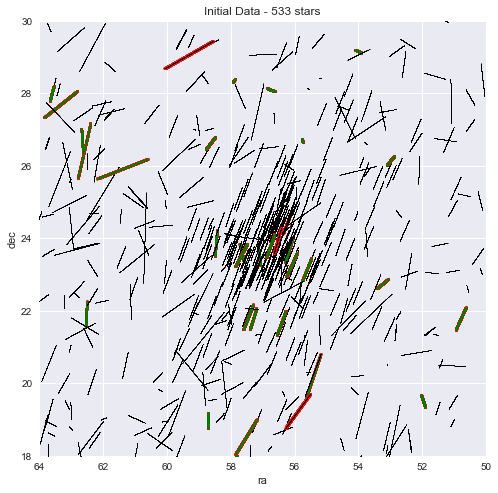

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,69834763780636672,56.309330,0.028709,25.088637,0.018692,19.029027,0.055813,-41.346153,0.041626,0.488959,11.103144,6.704078,0.031810,13.727313,14.589947,12.818868
1,71996090106350208,56.063878,0.048543,29.171192,0.025731,47.385379,0.078068,-37.330409,0.055320,60.496599,0.354755,6.707633,0.050268,10.793491,11.175298,10.269402
2,66003305059450752,60.413108,0.062604,24.499814,0.022878,45.724866,0.104681,-15.406060,0.054975,-3.997040,1.377450,6.710794,0.067905,12.769341,13.481380,11.967682
3,71377000637253504,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,0.915504,6.713325,0.106316,13.343994,14.181078,12.449644
4,65208087570988416,56.876688,0.048537,23.955071,0.024293,93.155275,0.091133,11.189542,0.053262,29.119016,1.555283,6.717703,0.053291,12.689098,13.263436,11.981298


In [2]:
plt.hist(pleia['pmra_error'],bins = 50, color = (39/255, 86/255, 173/255))
plt.title('pmra_error')
plt.show()
plt.hist(pleia['pmdec_error'],bins = 50, color = (39/255, 86/255, 173/255))
plt.title('pmdec_error')
plt.show()
plt.hist(pleia['radial_velocity_error'],bins = 50, color = (39/255, 86/255, 173/255))
plt.title('radial_velocity_error')
plt.show()

ra0, dec0 = pleia['ra'], pleia['dec'] 
pmra, pmdec = mas_deg(pleia['pmra']), mas_deg(pleia['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([64,50])
plt.ylim([18,30])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Initial Data - {} stars'.format(len(pleia)))
for i in range(len(pleia)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    if pleia['pmra_error'][i] > .25:
        plt.scatter(ra, dec, s = 5, c = 'r'  )
    if pleia['pmdec_error'][i] > .2:
        plt.scatter(ra, dec, s = 1, c = 'g'  )
    else:
        plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
pleia.head()

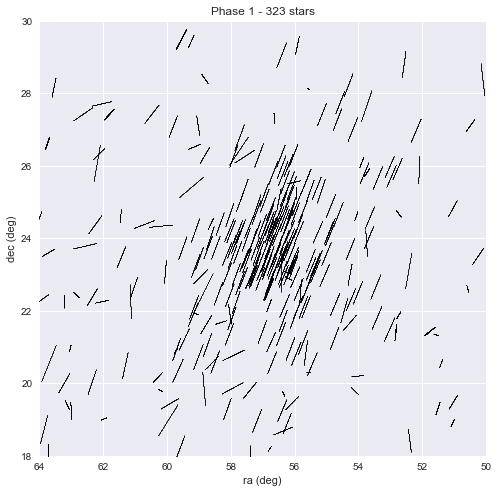

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,6.600331e+16,60.413108,0.062604,24.499814,0.022878,45.724866,0.104681,-15.406060,0.054975,-3.997040,1.377450,6.710794,0.067905,12.769341,13.481380,11.967682
1,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,0.915504,6.713325,0.106316,13.343994,14.181078,12.449644
2,4.497649e+16,56.075490,0.041107,18.805506,0.024255,43.077890,0.091954,-15.641666,0.057233,25.123727,1.234093,6.722953,0.044033,11.115603,11.528797,10.569345
3,1.497608e+17,63.535139,0.040027,23.716910,0.020024,28.767887,0.094180,-14.897638,0.060749,-9.877865,0.347493,6.723828,0.038731,9.696968,10.126672,9.128590
4,6.158382e+16,52.683751,0.030092,21.985212,0.019926,9.521259,0.064925,-14.283666,0.046666,1.716924,1.270037,6.727641,0.030116,12.958393,13.652630,12.161659
5,6.480484e+16,56.722015,0.045637,22.880754,0.025131,19.053649,0.093401,-41.516848,0.057526,6.568174,0.858024,6.732059,0.048581,11.551752,12.021861,10.952161
6,6.259348e+16,50.614428,0.037549,22.722952,0.023834,-4.400793,0.078186,-13.935844,0.052261,-2.731205,1.063437,6.733296,0.036813,12.310898,12.909485,11.598093
7,5.804799e+16,53.847340,0.038889,20.232852,0.027006,26.781271,0.101574,-3.154614,0.068483,29.453358,0.691037,6.748147,0.045441,11.221642,11.655634,10.660399
8,1.626079e+17,62.105344,0.034836,26.583190,0.016629,14.286936,0.080672,-73.160302,0.050839,2.809591,0.685754,6.748933,0.036269,12.021635,12.549405,11.360164
9,6.892887e+16,52.812343,0.042178,24.773360,0.029905,-10.250857,0.082722,-12.453682,0.065678,13.385800,0.816881,6.754632,0.046937,11.821386,12.297910,11.210711


In [3]:
# membership 
members = []
delta = pmdec
mu = np.mean(pmdec)
std = np.std(pmdec)
score1 = [z_score(i,mu,std) for i in delta]
delta = pmra
mu = np.mean(pmra)
std = np.std(pmra)
score2 = [z_score(i,mu,std) for i in delta]
delta = pleia['radial_velocity']
mu = np.mean(pleia['radial_velocity'])
std = np.std(pleia['radial_velocity'])
score3 = [z_score(i,mu,std) for i in delta]

for i in range(0,len(delta)):
    if score1[i] >=   -1.65 and score1[i] <=  1.65 \
        and score2[i] >=  -1.65 and score2[i] <=  1.65 \
        and score3[i] >=  -1.65 and score3[i] <=  1.65 \
        and pleia['radial_velocity_error'][i] < 5 \
        and pleia['pmra_error'][i] < .25 \
        and pleia['pmdec_error'][i] < .2:
            members.append(list(pleia.loc[i]))  
        
# plotting filtered members 
members = pd.DataFrame(members, columns = list(pleia))
ra0, dec0 = members['ra'], members['dec'] 
pmra, pmdec = mas_deg(members['pmra']), mas_deg(members['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([64,50])
plt.ylim([18,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,50):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
members[:10]

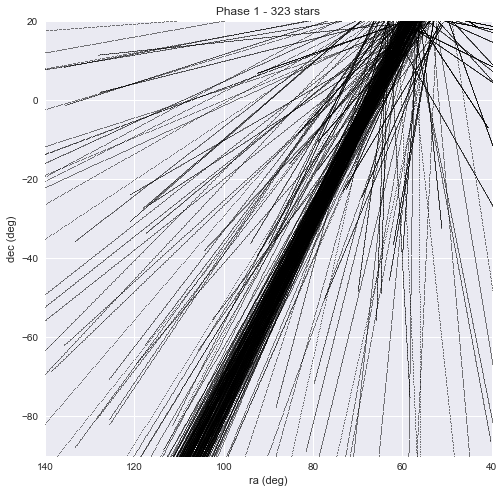

In [4]:
# view of intermediate filtering over long term

stars = {}
plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-90,20])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    stars[i] = [ra,dec]
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

Point of Convergence: 

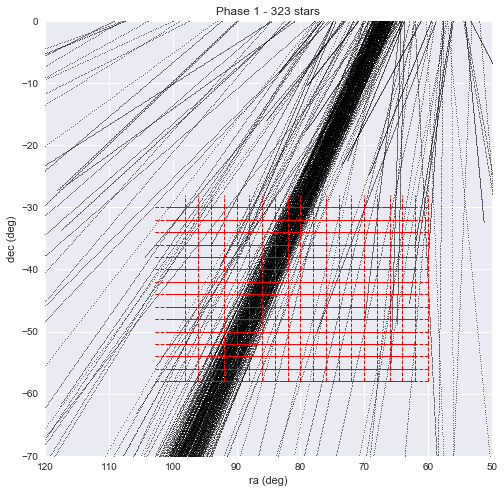

Point of Convergence [80, 85, -36, -34]


In [5]:
# Point of Convergence Determination 

stars = {}
plt.figure(figsize=(8,8))
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.xlim([120,50,])
plt.ylim([-70,0])
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    stars[i] = [ra,dec]
    plt.scatter(ra, dec, s = .2, c = 'k'  )

partitions = {}

step_ra = 5
step_dec = 2
BOX = 0
RA = np.arange(60,100,2) #2.5
DEC = np.arange(-30,-60,-2) #2.5

for R in RA:
    for D in DEC:
        appearance = 0
        for i in range(len(stars)):
            for j in range(len(stars[i][0])):
                if stars[i][0][j] > R and stars[i][0][j] < R + step_ra \
                and stars[i][1][j] > D and stars[i][1][j] < D + step_dec:
                    appearance += 1
        #print(BOX,'Freq',appearance, '-- {} <= ra <= {} | {} <= dec <= {}'.format(R,R+step_ra,D,D+step_dec))
        partitions[BOX] = [appearance,R,R+step_ra,D,D+step_dec]
        plt.plot([R,R+step_ra],[D,D],color='r',linestyle = 'dashed',linewidth = 1)
        plt.plot([R,R],[D,D+step_dec],color = 'r',linestyle = 'dashed',linewidth = 1)
        BOX += 1

boxes = [(num-1,partitions[i]) for num ,i in enumerate(partitions,1)]
for i in range(len(boxes)):
    if boxes[i][1] == max([boxes[i][1] for i in range(len(boxes))]):
        print('Point of Convergence: ',end= '')
        POC = partitions[boxes[i][0]][1:]
        

plt.show()
print('Point of Convergence',POC)

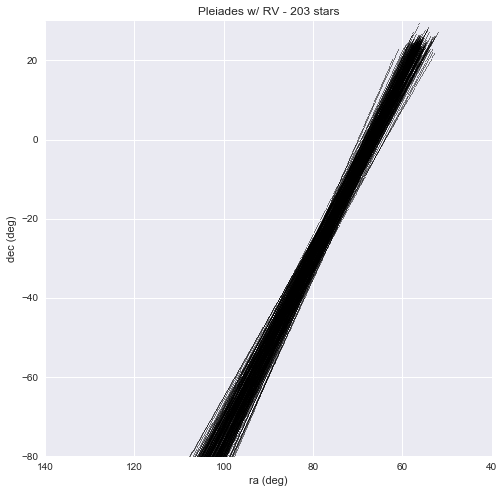

Predicted point of convergence = [80,85] x [-36,-34]
Literature point of convergence


,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,0.915504,6.713325,0.106316,13.343994,14.181078,12.449644
1,6.480484e+16,56.722015,0.045637,22.880754,0.025131,19.053649,0.093401,-41.516848,0.057526,6.568174,0.858024,6.732059,0.048581,11.551752,12.021861,10.952161
2,6.492441e+16,57.485489,0.047968,23.218437,0.019547,19.086746,0.094143,-43.219799,0.058873,6.973386,1.081165,6.798871,0.049904,10.134455,10.460739,9.674894
3,6.964376e+16,52.890211,0.056275,26.265284,0.027598,20.625067,0.100793,-42.058767,0.064790,3.578754,1.167696,6.812580,0.056553,10.573719,10.942920,10.064533
4,6.948598e+16,53.685024,0.048533,26.095801,0.028268,20.005172,0.103818,-42.262904,0.064930,5.067254,1.399830,6.830572,0.051016,12.849354,13.525347,12.076657


In [6]:
ra0, dec0 = members['ra'], members['dec'] 
pmra, pmdec = mas_deg(members['pmra']), mas_deg(members['pmdec'])

# point convergence
raa = []
decc = []
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    raa.append(ra)
    decc.append(dec)

final = []
# POC = [a,b,c,d]
for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= POC[1] and raa[i][x] >= POC[0] and \
        decc[i][x] <= POC[3] and decc[i][x] >= POC[2]:
            final.append(list(members.loc[i]))
            break

final = pd.DataFrame(final, columns = list(pleia))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])

# plotting results 
plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Pleiades w/ RV - {} stars'.format(len(final)))

for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
print('Predicted point of convergence = [{},{}] x [{},{}]'.format(POC[0],POC[1],POC[2],POC[3]))
print('Literature point of convergence')
final.head()

In [7]:
# Calculated Paramaters 

# positions after 1,000,000 years
final['dist'] = [1/(i/1000) for i in final['parallax']]
final['dist_error'] = [1/(i/1000) for i in final['parallax_error']]# pc 
final['rad_v'] = [i*(1.022035e-6) for i in final['radial_velocity']] # km/s -> pc / yr 
finra = []
findec = []
findist = []
pm_scalar = []

# final positions
for i in range(len(final['ra'])):
    finra.append(final['ra'][i] + (mas_deg(final['pmra'][i] * 1000000)))
    findec.append(final['dec'][i] + (mas_deg(final['pmdec'][i] * 1000000)))
    findist.append(final['dist'][i] + final['rad_v'][i]* 1000000) # pc + pc 
final['finra'] = finra
final['findec'] = findec
final['findist'] = findist

# arc/yr, magnitude of <ra + dec> 
for i in range(len(final['pmra'])):
    pm_scalar.append(np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2))
tang_v = [pm_scalar[i]*final['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
final['pm_scalar'] = pm_scalar
final['tang_v'] = tang_v
final['true_v'] = [np.sqrt((final['tang_v'][i])**2 + (final['radial_velocity'][i])**2) \
                   for i in range(len(final['tang_v']))]
final.head()

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,...,phot_rp_mean_mag,dist,dist_error,rad_v,finra,findec,findist,pm_scalar,tang_v,true_v
0,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,...,12.449644,148.957480,9405.901447,0.000002,59.817652,15.515130,150.713926,0.047428,33.487066,33.531136
1,6.480484e+16,56.722015,0.045637,22.880754,0.025131,19.053649,0.093401,-41.516848,0.057526,6.568174,...,10.952161,148.542961,20584.248428,0.000007,62.014695,11.348296,155.255864,0.045680,32.163211,32.827018
2,6.492441e+16,57.485489,0.047968,23.218437,0.019547,19.086746,0.094143,-43.219799,0.058873,6.973386,...,9.674894,147.083244,20038.448517,0.000007,62.787363,11.212938,154.210288,0.047247,32.939229,33.669288
3,6.964376e+16,52.890211,0.056275,26.265284,0.027598,20.625067,0.100793,-42.058767,0.064790,3.578754,...,10.064533,146.787278,17682.604986,0.000004,58.619397,14.582293,150.444890,0.046844,32.592528,32.788418
4,6.948598e+16,53.685024,0.048533,26.095801,0.028268,20.005172,0.103818,-42.262904,0.064930,5.067254,...,12.076657,146.400628,19601.776596,0.000005,59.242017,14.356106,151.579539,0.046759,32.447565,32.840852


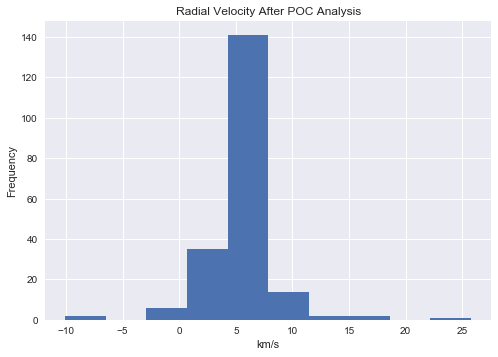

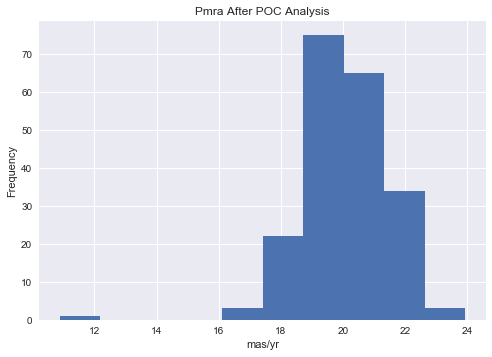

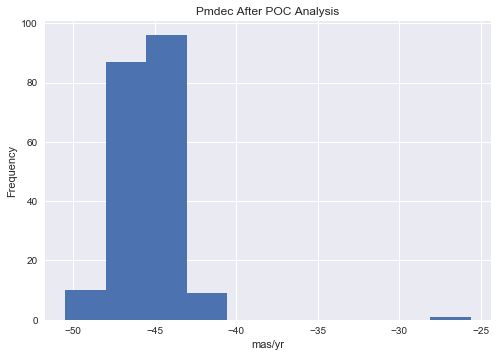

In [8]:
plt.hist(final['radial_velocity'])
plt.title('Radial Velocity After POC Analysis')
plt.xlabel('km/s')
plt.ylabel('Frequency')
plt.show()
plt.hist(final['pmra'])
plt.xlabel('mas/yr')
plt.ylabel('Frequency')
plt.title('Pmra After POC Analysis')
plt.show()
plt.hist(final['pmdec'])
plt.xlabel('mas/yr')
plt.ylabel('Frequency')
plt.title('Pmdec After POC Analysis')
plt.show()

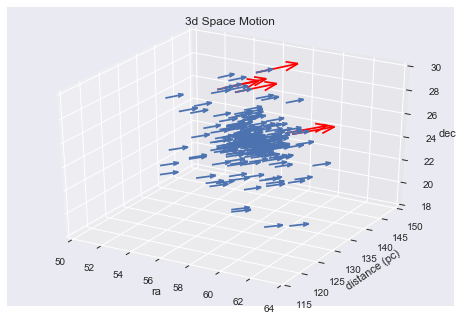

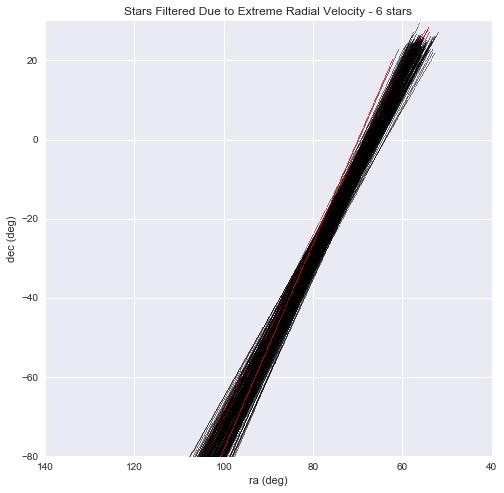

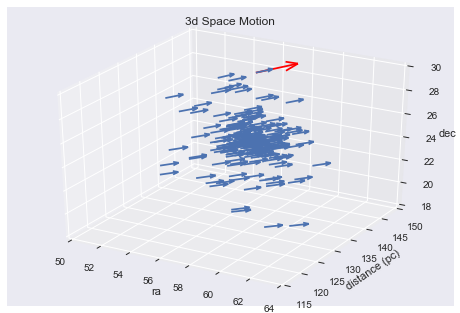

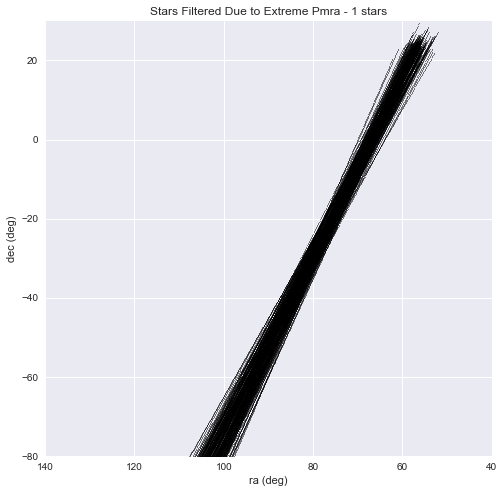

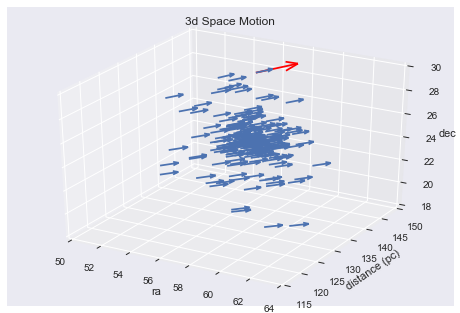

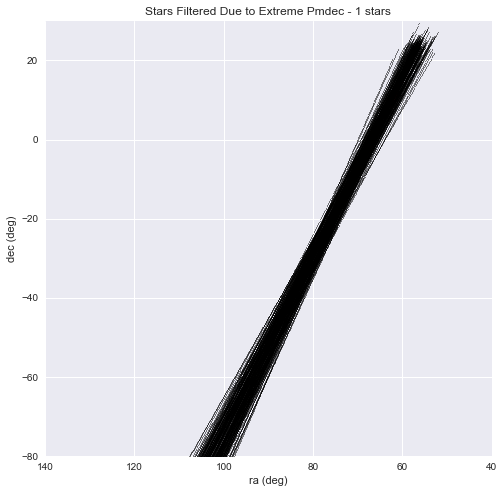

In [9]:
# inspecting outliers 

# radial velocity
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 2, normalize = True)

extreme_rvs = [i for i in range(len(final['radial_velocity'])) if final['radial_velocity'][i] > 12.5\
              or final['radial_velocity'][i] < -5]

extr2 = []
for i in range(len(extreme_rvs)):
    x = (final.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Radial Velocity - {} stars'.format(len(extreme_rvs)))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_rvs:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

# --------------------------------------------------------

# pmra 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 2, normalize = True)

extreme_pmra = [i for i in range(len(final['pmra'])) if final['pmra'][i] < 14]

extr2 = []
for i in range(len(extreme_pmra)):
    x = (final.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Pmra - {} stars'.format(len(extreme_pmra)))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_pmra:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

# --------------------------------------------------------

#pmdec
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 2, normalize = True)

extreme_pmdec = [i for i in range(len(final['pmdec'])) if final['pmdec'][i] > -30]

extr2 = []
for i in range(len(extreme_pmdec)):
    x = (final.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Pmdec - {} stars'.format(len(extreme_pmdec)))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_pmdec:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

In [10]:
# New 'final' after filtering extremes + necessary paramater calculations

print('# of members before filtering possible non-members (stored in extr1 and extr2): {}'.format(len(final)))
extremes = extreme_rvs + extreme_pmra + extreme_pmdec
testt = []
for i in range(len(final)):
    if i in extremes:
        pass
    else:
        testt.append(list(final.loc[i]))

final = pd.DataFrame(testt, columns = list(final))
print('# of members after: {}'.format(len(final)))
print()

# Calculated Paramaters 

# positions after 1,000,000 years
final['dist'] = [1/(i/1000) for i in final['parallax']] # pc 
final['rad_v'] = [i*(1.022035e-6) for i in final['radial_velocity']] # km/s -> pc / yr 
finra = []
findec = []
findist = []
pm_scalar = []

# final positions
for i in range(len(final['ra'])):
    finra.append(final['ra'][i] + (mas_deg(final['pmra'][i] * 1000000)))
    findec.append(final['dec'][i] + (mas_deg(final['pmdec'][i] * 1000000)))
    findist.append(final['dist'][i] + final['rad_v'][i]* 1000000) # pc + pc 
final['finra'] = finra
final['findec'] = findec
final['findist'] = findist

# arc/yr, magnitude of <ra + dec> 
for i in range(len(final['pmra'])):
    pm_scalar.append(np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2))
tang_v = [pm_scalar[i]*final['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
final['pm_scalar'] = pm_scalar
final['tang_v'] = tang_v
final['true_v'] = [np.sqrt((final['tang_v'][i])**2 + (final['radial_velocity'][i])**2) \
                   for i in range(len(final['tang_v']))]

pm_scalar_error = []
for i in range(len(final['pmra'])):
    pm = np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2)
    x = power_uncertainty(final['pmra'][i]/1000,final['pmra_error'][i]/1000,2)
    y = power_uncertainty(final['pmdec'][i]/1000,final['pmdec_error'][i]/1000,2)
    z = np.sqrt((x**2)+(y**2))
    uncert = power_uncertainty(pm,z,.5)
    pm_scalar_error.append(uncert)
final['pm_scalar_error'] = pm_scalar_error

final.head()

# of members before filtering possible non-members (stored in extr1 and extr2): 203
# of members after: 197



,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,...,dist,dist_error,rad_v,finra,findec,findist,pm_scalar,tang_v,true_v,pm_scalar_error
0,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,...,148.957480,9405.901447,0.000002,59.817652,15.515130,150.713926,0.047428,33.487066,33.531136,0.180620
1,6.480484e+16,56.722015,0.045637,22.880754,0.025131,19.053649,0.093401,-41.516848,0.057526,6.568174,...,148.542961,20584.248428,0.000007,62.014695,11.348296,155.255864,0.045680,32.163211,32.827018,0.111516
2,6.492441e+16,57.485489,0.047968,23.218437,0.019547,19.086746,0.094143,-43.219799,0.058873,6.973386,...,147.083244,20038.448517,0.000007,62.787363,11.212938,154.210288,0.047247,32.939229,33.669288,0.108304
3,6.964376e+16,52.890211,0.056275,26.265284,0.027598,20.625067,0.100793,-42.058767,0.064790,3.578754,...,146.787278,17682.604986,0.000004,58.619397,14.582293,150.444890,0.046844,32.592528,32.788418,0.109384
4,6.948598e+16,53.685024,0.048533,26.095801,0.028268,20.005172,0.103818,-42.262904,0.064930,5.067254,...,146.400628,19601.776596,0.000005,59.242017,14.356106,151.579539,0.046759,32.447565,32.840852,0.115747


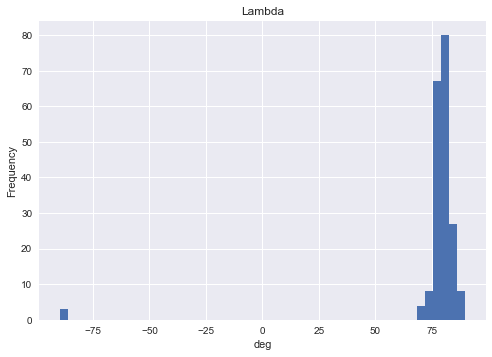

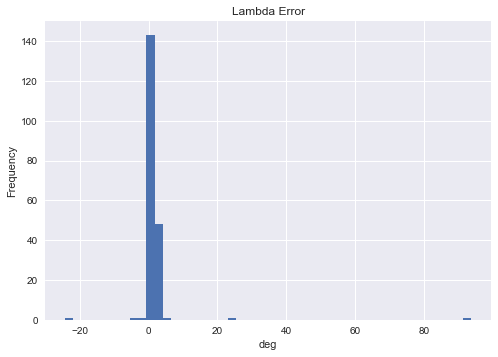

# of members before filtering possible non-members (stored in extr1 and extr2): 197
# of members after: 192



,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,...,dist,dist_error,rad_v,finra,findec,findist,pm_scalar,tang_v,true_v,pm_scalar_error
0,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,...,148.957480,9405.901447,0.000002,59.817652,15.515130,150.713926,0.047428,33.487066,33.531136,0.180620
1,6.480484e+16,56.722015,0.045637,22.880754,0.025131,19.053649,0.093401,-41.516848,0.057526,6.568174,...,148.542961,20584.248428,0.000007,62.014695,11.348296,155.255864,0.045680,32.163211,32.827018,0.111516
2,6.492441e+16,57.485489,0.047968,23.218437,0.019547,19.086746,0.094143,-43.219799,0.058873,6.973386,...,147.083244,20038.448517,0.000007,62.787363,11.212938,154.210288,0.047247,32.939229,33.669288,0.108304
3,6.964376e+16,52.890211,0.056275,26.265284,0.027598,20.625067,0.100793,-42.058767,0.064790,3.578754,...,146.787278,17682.604986,0.000004,58.619397,14.582293,150.444890,0.046844,32.592528,32.788418,0.109384
4,6.948598e+16,53.685024,0.048533,26.095801,0.028268,20.005172,0.103818,-42.262904,0.064930,5.067254,...,146.400628,19601.776596,0.000005,59.242017,14.356106,151.579539,0.046759,32.447565,32.840852,0.115747


In [11]:
# Analyzing distribution of lambda after filtering blatant extremes

lambd = []
lambd_error = []
for i in range(len(final)):
    x = 180*math.atan(4.74*final['pm_scalar'][i]/final['radial_velocity'][i]*final['dist'][i])/math.pi
    lambd.append(x)
    y = mult_uncertainty(4.74*final['pm_scalar'][i],4.74*final['pm_scalar_error'][i],\
                              final['radial_velocity'][i],final['radial_velocity_error'][i],\
                              final['parallax'][i],final['parallax_error'][i])
    # Propogate lambda errors properly to calculate the uncertainty in the mean of lambda, then those two variabels are set and we gucci
    uncert = (180*(1/(1+x))/math.pi)*y
    lambd_error.append(uncert)

plt.hist(lambd,bins = 50)
plt.title('Lambda')
plt.xlabel('deg')
plt.ylabel('Frequency')
plt.show()
plt.hist(lambd_error,bins=50)
plt.title('Lambda Error')
plt.xlabel('deg')
plt.ylabel('Frequency')
plt.show()

extreme_lamba = [i for i in range(len(lambd)) if lambd[i] < 50]
extreme_lamba_error = [i for i in range(len(lambd)) if lambd_error[i] < -20 or lambd_error[i] > 20]

# New 'final' after filtering extremes + necessary paramater calculations

print('# of members before filtering possible non-members (stored in extr1 and extr2): {}'.format(len(final)))
extremes = extreme_lamba + extreme_lamba_error 
testt = []
for i in range(len(final)):
    if i in extremes:
        pass
    else:
        testt.append(list(final.loc[i]))

final = pd.DataFrame(testt, columns = list(final))
print('# of members after: {}'.format(len(final)))
print()

# Calculated Paramaters 

lambd = []
lambd_error = []
for i in range(len(final)):
    x = 180*math.atan(4.74*final['pm_scalar'][i]/final['radial_velocity'][i]*final['dist'][i])/math.pi
    lambd.append(x)
    y = mult_uncertainty(4.74*final['pm_scalar'][i],4.74*final['pm_scalar_error'][i],\
                              final['radial_velocity'][i],final['radial_velocity_error'][i],\
                              final['parallax'][i],final['parallax_error'][i])
    # Propogate lambda errors properly to calculate the uncertainty in the mean of lambda, then those two variabels are set and we gucci
    uncert = (180*(1/(1+x))/math.pi)*y
    lambd_error.append(uncert)

# positions after 1,000,000 years
lambd_av = np.mean(lambd)
lambd_Er = np.round(np.sqrt(sum([i**2 for i in lambd_error]))\
                                        /(len(lambd_error)**2),4)

final['dist'] = [1/(i/1000) for i in final['parallax']] # pc 
final['rad_v'] = [i*(1.022035e-6) for i in final['radial_velocity']] # km/s -> pc / yr 
finra = []
findec = []
findist = []

# final positions
for i in range(len(final['ra'])):
    finra.append(final['ra'][i] + (mas_deg(final['pmra'][i] * 1000000)))
    findec.append(final['dec'][i] + (mas_deg(final['pmdec'][i] * 1000000)))
    findist.append(final['dist'][i] + final['rad_v'][i]* 1000000) # pc + pc 
final['finra'] = finra
final['findec'] = findec
final['findist'] = findist

# arc/yr, magnitude of <ra, dec> 
pm_scalar = []
for i in range(len(final['pmra'])):
    pm_scalar.append(np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2))
    
tang_v = [pm_scalar[i]*final['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
final['pm_scalar'] = pm_scalar
final['tang_v'] = tang_v
final['true_v'] = [np.sqrt((final['tang_v'][i])**2 + (final['radial_velocity'][i])**2) \
                   for i in range(len(final['tang_v']))]

pm_scalar_error = []
for i in range(len(final['pmra'])):
    pm = np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2)
    x = power_uncertainty(final['pmra'][i]/1000,final['pmra_error'][i]/1000,2)
    y = power_uncertainty(final['pmdec'][i]/1000,final['pmdec_error'][i]/1000,2)
    z = np.sqrt((x**2)+(y**2))
    uncert = power_uncertainty(pm,z,.5)
    pm_scalar_error.append(uncert)
final['pm_scalar_error'] = pm_scalar_error

final.head()

No have propagated errors, will wait until conclusion


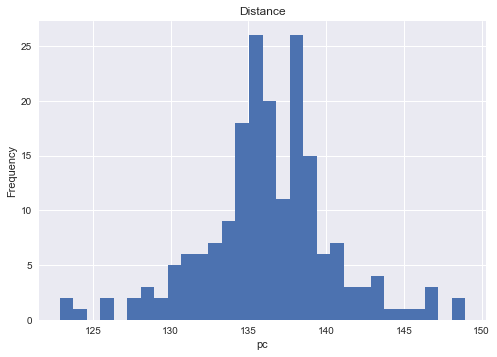

µ = 136.2937 pc
σ = 4.2578 pc


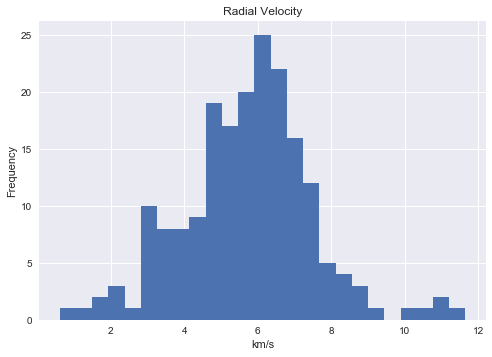

µ = 5.7126 +- 0.0007 km/s
σ = 1.7769 pc


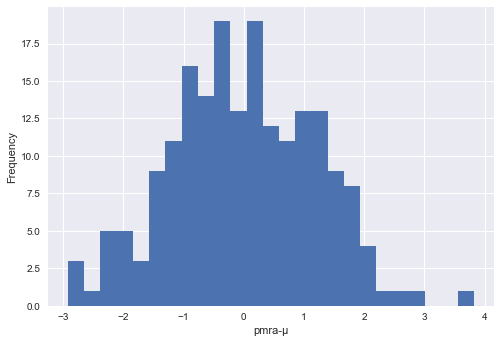

µ = 20.1308 mas/yr
σ = 1.2117 pc


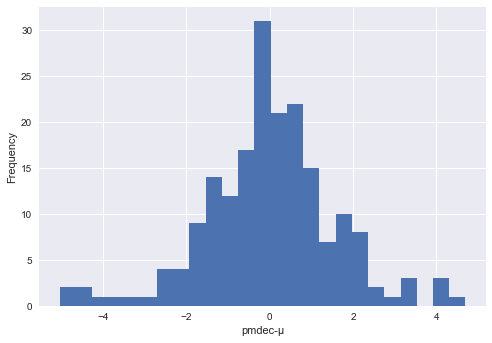

µ = -45.4609 mas/yr
σ = 1.5824 pc


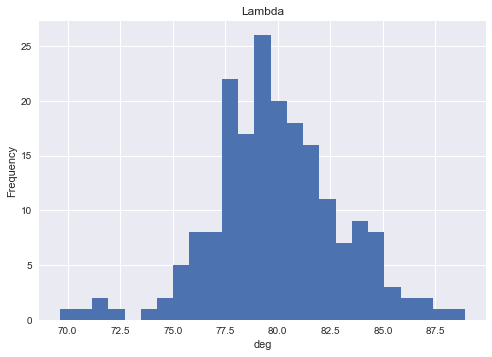

µ = 79.9244 mas/yr
σ = 3.102 pc


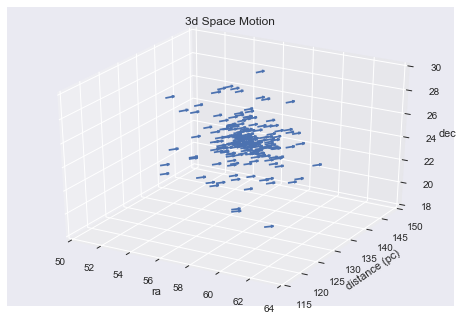

Center of Mass Without RV: (56.37 ra, 23.99 dec)


In [12]:
# FINAL 

print('No have propagated errors, will wait until conclusion')
plt.hist(final['dist'],bins = 30)
plt.title('Distance')
plt.xlabel('pc')
plt.ylabel('Frequency')
plt.show()
print('µ = {} pc'.format(np.round(np.mean(final['dist']),4)))
print('σ = {} pc'.format(np.round(np.std(final['dist']),4)))

plt.hist(final['radial_velocity'],bins = 25)
plt.title('Radial Velocity')
plt.xlabel('km/s')
plt.ylabel('Frequency')
plt.show()
rv_error_spec = np.round(np.sqrt(sum([i**2 for i in final['radial_velocity_error']]))\
                                        /(len(final['radial_velocity_error'])**2),4)
print('µ = {} +- {} km/s'.format(np.round(np.mean(final['radial_velocity']),4),rv_error_spec))
print('σ = {} pc'.format(np.round(np.std(final['radial_velocity']),4)))

plt.hist(final['pmra']-np.mean(final['pmra']),bins = 25)
plt.xlabel('pmra-µ')
plt.ylabel('Frequency')
plt.show()
print('µ = {} mas/yr'.format(np.round(np.mean(final['pmra']),4)))
print('σ = {} pc'.format(np.round(np.std(final['pmra']),4)))

plt.hist(final['pmdec']-np.mean(final['pmdec']),bins = 25)

plt.xlabel('pmdec-µ')
plt.ylabel('Frequency')
plt.show()
print('µ = {} mas/yr'.format(np.round(np.mean(final['pmdec']),4)))
print('σ = {} pc'.format(np.round(np.std(final['pmdec']),4)))

plt.hist(lambd,bins = 25)
plt.title('Lambda')
plt.xlabel('deg')
plt.ylabel('Frequency')
plt.show()
print('µ = {} mas/yr'.format(np.round(np.mean(lambd),4)))
print('σ = {} pc'.format(np.round(np.std(lambd),4)))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')

start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
# ra = y, dist = x, dec = z

ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

plt.show()
print('Center of Mass Without RV: ({} ra, {} dec)'.format(round(np.mean(final['ra']),2),round(np.mean(final['dec']),2)))

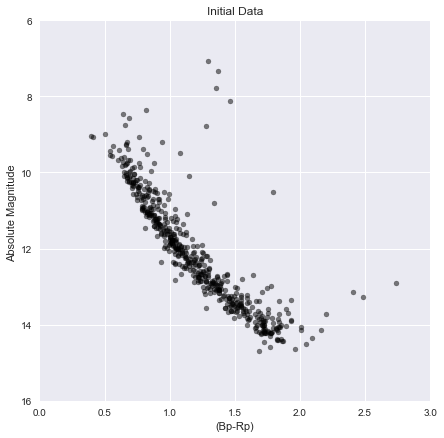

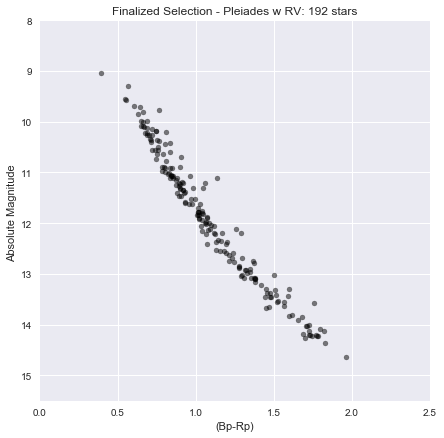

In [13]:
M_g = [abs_mag(pleia['phot_g_mean_mag'][i],pleia['parallax'][i]) for i in range(len(pleia['ra']))]
M_rp = [abs_mag(pleia['phot_rp_mean_mag'][i],pleia['parallax'][i]) for i in range(len(pleia['ra']))]
M_b = [abs_mag(pleia['phot_bp_mean_mag'][i],pleia['parallax'][i]) for i in range(len(pleia['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Initial Data')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([16,6])
plt.scatter(color_index, M_g,marker='o', s=25,alpha = .5, c = 'k')
plt.style.use('seaborn')
plt.show() 

M_gF = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_rp = [abs_mag(final['phot_rp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_b = [abs_mag(final['phot_bp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
color_indexF = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Finalized Selection - Pleiades w RV: {} stars'.format(len(final)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,2.5])
plt.ylim([15.5,8])
plt.scatter(color_indexF, M_gF,marker='o', s=25, alpha = .5,c = 'k')
plt.style.use('seaborn')
plt.show()

-- Pleiades wo RV(Epoch J2015.5) -- 

50 <= ra <= 64
18 <= dec <= 30
6.702413 <= parallax <= 8.143322


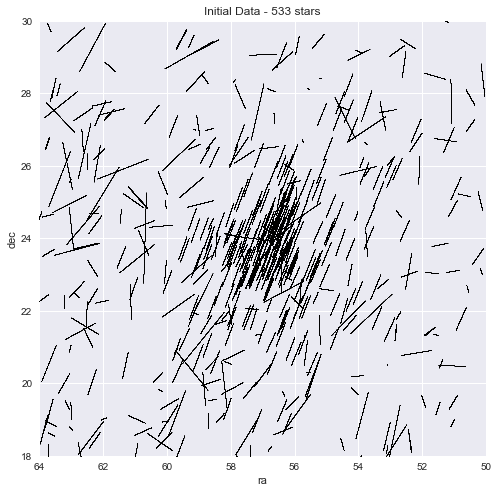

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,69834763780636672,56.309330,0.028709,25.088637,0.018692,19.029027,0.055813,-41.346153,0.041626,0.488959,11.103144,6.704078,0.031810,13.727313,14.589947,12.818868
1,71996090106350208,56.063878,0.048543,29.171192,0.025731,47.385379,0.078068,-37.330409,0.055320,60.496599,0.354755,6.707633,0.050268,10.793491,11.175298,10.269402
2,66003305059450752,60.413108,0.062604,24.499814,0.022878,45.724866,0.104681,-15.406060,0.054975,-3.997040,1.377450,6.710794,0.067905,12.769341,13.481380,11.967682
3,71377000637253504,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,1.718577,0.915504,6.713325,0.106316,13.343994,14.181078,12.449644
4,65208087570988416,56.876688,0.048537,23.955071,0.024293,93.155275,0.091133,11.189542,0.053262,29.119016,1.555283,6.717703,0.053291,12.689098,13.263436,11.981298


In [14]:
# Data without RV

pleia1 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Pleiades-Open-Cluster/pleia_wo_rv.csv')
pleia1['dist'] = [1/(i/1000) for i in pleia1['parallax']]
pleia1['dist_error'] = [1/(i/1000) for i in pleia1['parallax_error']]

pm_scalar = []
pm_scalar_error = []
for i in range(len(pleia1['pmra'])):
    pm = np.sqrt((pleia1['pmra'][i]/1000)**2+(pleia1['pmdec'][i]/1000)**2)
    x = power_uncertainty(pleia1['pmra'][i]/1000,pleia1['pmra_error'][i]/1000,2)
    y = power_uncertainty(pleia1['pmdec'][i]/1000,pleia1['pmdec_error'][i]/1000,2)
    z = np.sqrt((x**2)+(y**2))
    uncert = power_uncertainty(pm,z,.5)
    pm_scalar.append(pm)
    pm_scalar_error.append(uncert)
    
pleia1['pm_scalar'] = pm_scalar
pleia1['pm_scalar_error'] = pm_scalar_error
tang_v = [pm_scalar[i]*pleia1['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 

print('-- Pleiades wo RV(Epoch J2015.5) -- ')
print()
print('50 <= ra <= 64\n18 <= dec <= 30\n6.702413 <= parallax <= 8.143322')

ra0, dec0 = pleia['ra'], pleia['dec'] 
pmra, pmdec = mas_deg(pleia['pmra']), mas_deg(pleia['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([64,50])
plt.ylim([18,30])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Initial Data - {} stars'.format(len(pleia)))
for i in range(len(pleia)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
pleia.head()

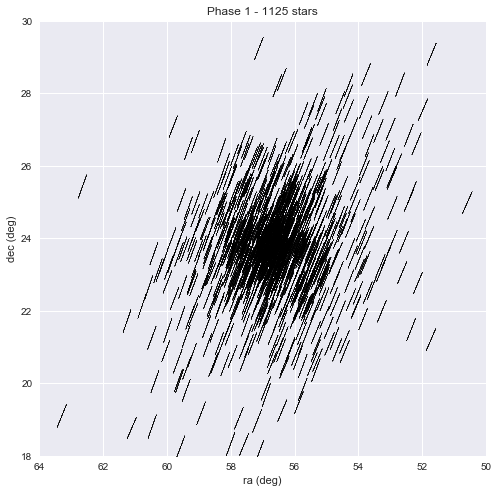

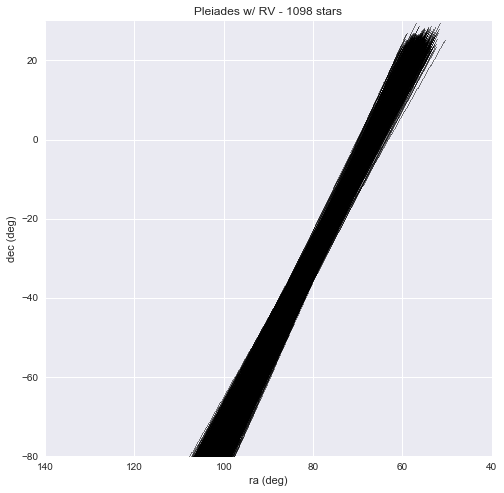

Predicted point of convergence = [80,85] x [-36,-34]
Literature point of convergence


In [15]:
# membership 

ra0, dec0 = pleia1['ra'], pleia1['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
pmraT, pmdecT= mas_deg(pleia1['pmra']), mas_deg(pleia1['pmdec'])

members1 = []
delta = pmdecT
mu = np.mean(pmdec)
std = np.std(pmdec)
score1 = [z_score(i,mu,std) for i in delta]
delta = pmraT
mu = np.mean(pmra)
std = np.std(pmra)
score2 = [z_score(i,mu,std) for i in delta]
for i in range(0,len(delta)):
    if score1[i] >=   -1.65 and score1[i] <=  1.65 \
        and score2[i] >=  -1.65 and score2[i] <=  1.65:
            members1.append(list(pleia1.loc[i]))

members1 = pd.DataFrame(members1, columns = list(pleia1))
        
# plotting filtered members 

ra0, dec0 = members1['ra'], members1['dec'] 
pmra, pmdec = mas_deg(members1['pmra']), mas_deg(members1['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([64,50])
plt.ylim([18,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members1)))
for i in range(len(members1)):
    ra = []
    dec = []
    for x in range(1,5000,50):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

## 

raa = []
decc = []
for i in range(len(members1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    raa.append(ra)
    decc.append(dec)

final1 = []
# POC = [a,b,c,d]
for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= POC[1] and raa[i][x] >= POC[0] and \
        decc[i][x] <= POC[3] and decc[i][x] >= POC[2]:
            final1.append(list(members1.loc[i]))
            break

final1 = pd.DataFrame(final1, columns = list(pleia1))

ra0, dec0 = final1['ra'], final1['dec'] 
pmra, pmdec = mas_deg(final1['pmra']), mas_deg(final1['pmdec'])

# plotting results 
plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Pleiades w/ RV - {} stars'.format(len(final1)))

for i in range(len(final1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
print('Predicted point of convergence = [{},{}] x [{},{}]'.format(POC[0],POC[1],POC[2],POC[3]))
print('Literature point of convergence')

In [16]:
rvs = []
rvs_error = []
for i in range(len(final1)):
    rv = (4.74*final1['pm_scalar'][i]/(np.tan(np.radians(lambd_av))*(final1['parallax'][i]/1000)))
    uncert = mult_uncertainty(4.74*final1['pm_scalar'][i],4.74*final1['pm_scalar_error'][i],\
                              final1['parallax'][i],final1['parallax_error'][i],\
                              np.tan(np.radians(lambd_av)),np.tan(np.radians(lambd_Er)))
    rvs.append(rv)
    rvs_error.append(uncert)
final1['rad_v'] = rvs
final1['rad_v_pc_yr'] = [i*(1.022035e-6) for i in final1['rad_v']] # km/s -> pc / yr  EDIT
final1['rad_v_error'] = rvs_error

finra = []
findec = []
findist = []
for i in range(len(final1['ra'])):
    finra.append(final1['ra'][i] + (mas_deg(final1['pmra'][i] * 1000000)))
    findec.append(final1['dec'][i] + (mas_deg(final1['pmdec'][i] * 1000000)))
    findist.append(final1['dist'][i] + final1['rad_v_pc_yr'][i]* 1000000) # pc + pc 
final1['finra'] = finra
final1['findec'] = findec
final1['findist'] = findist

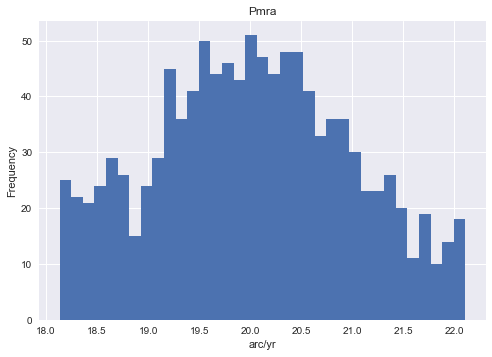

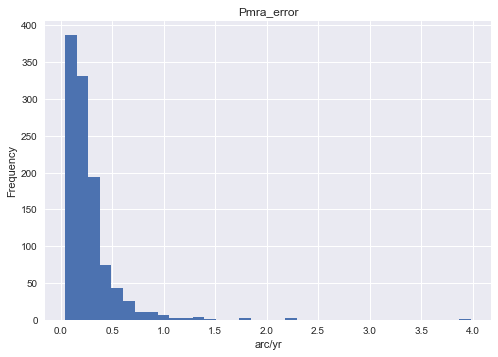

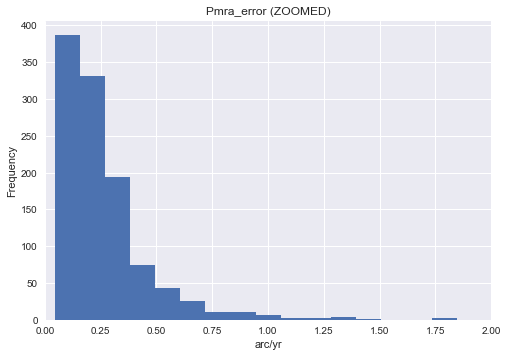

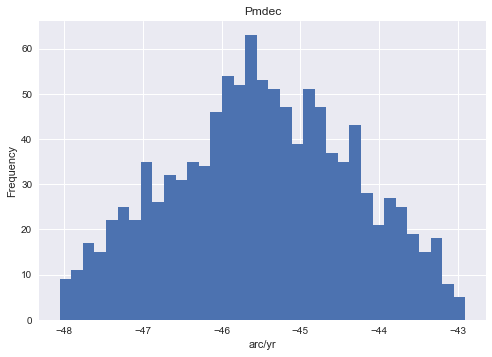

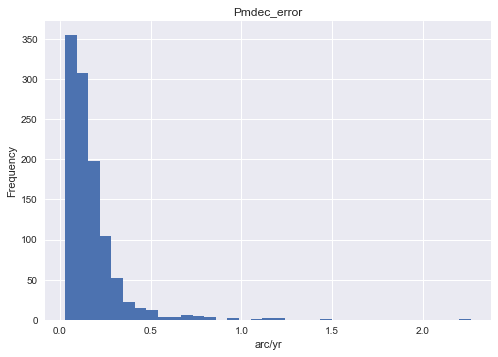

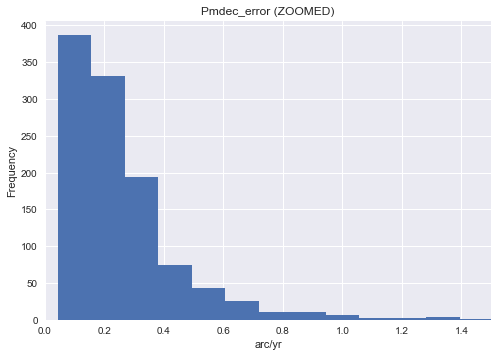

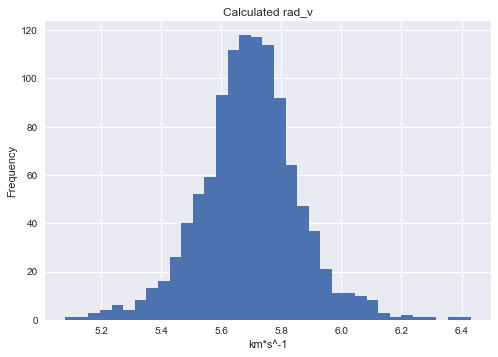

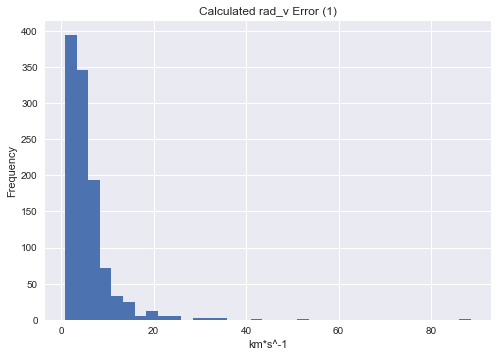

In [17]:
plt.hist(final1['pmra'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.title("Pmra")
plt.show()

plt.hist(final1['pmra_error'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.title("Pmra_error")
plt.show()

plt.hist(final1['pmra_error'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.xlim([0,2])
plt.title("Pmra_error (ZOOMED)")
plt.show()

plt.hist(final1['pmdec'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.title("Pmdec")
plt.show()

plt.hist(final1['pmdec_error'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.title("Pmdec_error")
plt.show()

#plt.figure(figsize=(7,4))
plt.hist(final1['pmra_error'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('arc/yr')
plt.xlim([0,1.5])
plt.title("Pmdec_error (ZOOMED)")
plt.show()

plt.hist(final1['rad_v'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('km*s^-1')
plt.title("Calculated rad_v")
plt.show()

plt.hist(final1['rad_v_error'],bins = 35)
plt.ylabel('Frequency')
plt.xlabel('km*s^-1')
plt.title("Calculated rad_v Error (1)")
plt.show()

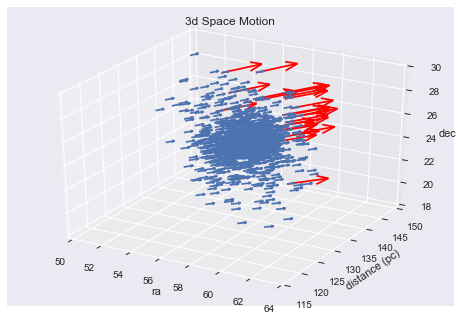

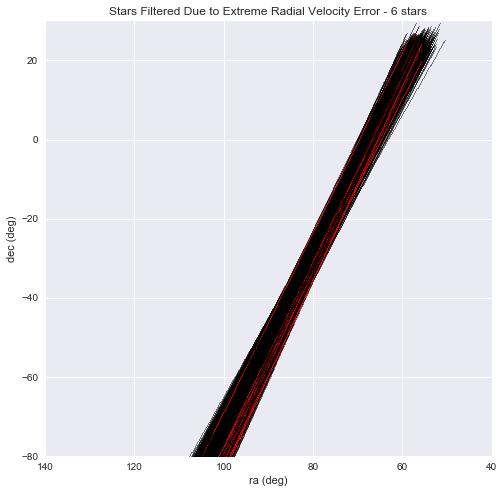

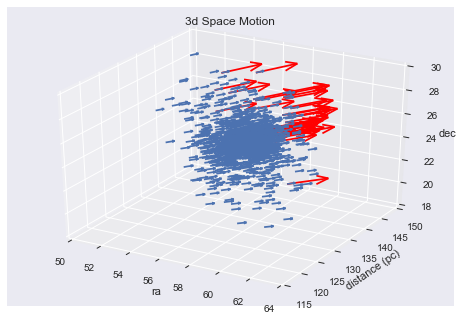

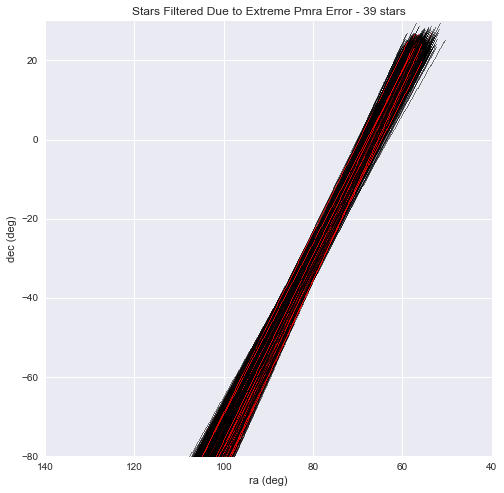

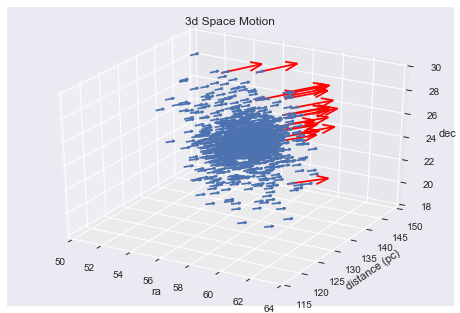

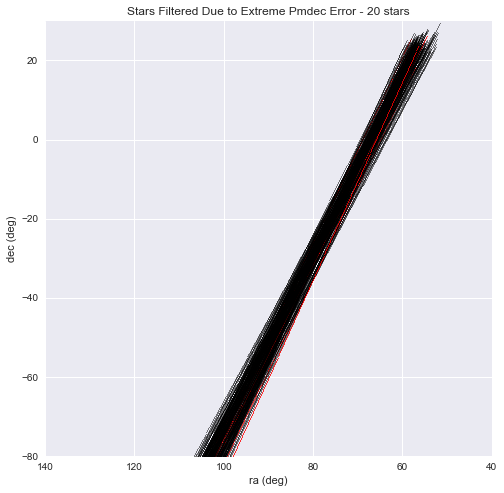

In [18]:
# inspecting outliers 

# radial velocity_error
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final1['ra'],final1['dist'],final1['dec']]
end = [final1['finra'],final1['findist'],final1['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

extreme_rad_v_error = [i for i in range(len(final1['rad_v_error'])) if final1['rad_v_error'][i] > 20]

extr2 = []
for i in range(len(extreme_rad_v_error)):
    x = (final1.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Radial Velocity Error - {} stars'.format(len(extreme_rvs)))

ra0, dec0 = final1['ra'], final1['dec'] 
pmra, pmdec = mas_deg(final1['pmra']), mas_deg(final1['pmdec'])
for i in range(len(final1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_rad_v_error:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

# --------------------------------------------------------

# pmra error
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final1['ra'],final1['dist'],final1['dec']]
end = [final1['finra'],final1['findist'],final1['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

extreme_pmra_error = [i for i in range(len(final1['pmra_error'])) if final1['pmra_error'][i] > .75]

extr2 = []
for i in range(len(extreme_pmra_error)):
    x = (final1.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Pmra Error - {} stars'.format(len(extreme_pmra_error)))

ra0, dec0 = final1['ra'], final1['dec'] 
pmra, pmdec = mas_deg(final1['pmra']), mas_deg(final1['pmdec'])
for i in range(len(final1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_pmra_error:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

# --------------------------------------------------------

#pmdec error
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50, 64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')
start = [final1['ra'],final1['dist'],final1['dec']]
end = [final1['finra'],final1['findist'],final1['findec']]
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

extreme_pmdec_error = [i for i in range(len(final1['pmdec_error'])) if final1['pmdec_error'][i] > .7]

extr2 = []
for i in range(len(extreme_pmdec_error)):
    x = (final1.loc[i])
    start = [x['ra'],x['dist'],x['dec']]
    end = [x['finra'],x['findist'],x['findec']]
    extr2.append(x)
    ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 5, normalize = True, color = 'r')

plt.figure(figsize=(8,8))
plt.xlim([140,40])
plt.ylim([-80,30])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Stars Filtered Due to Extreme Pmdec Error - {} stars'.format(len(extreme_pmdec_error)))

ra0, dec0 = final1['ra'], final1['dec'] 
pmra, pmdec = mas_deg(final1['pmra']), mas_deg(final1['pmdec'])
for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*2000))
        dec.append(dec0[i]+(pmdec[i]*x*2000))
    if i in extreme_pmdec_error:
        plt.scatter(ra, dec, s = .5, c = 'r')
    else:
        plt.scatter(ra, dec, s = .2, c = 'k')
plt.show()
extr2 = pd.DataFrame(extr2)
plt.show()

In [19]:
# New 'final1' after filtering extremes + necessary paramater calculations

print('# of members before filtering possible non-members (stored in extr1 and extr2): {}'.format(len(final1)))
extremes = extreme_rad_v_error + extreme_pmra_error + extreme_pmdec_error
testt = []
for i in range(len(final1)):
    if i in extremes:
        pass
    else:
        testt.append(list(final1.loc[i]))

finalF = pd.DataFrame(testt, columns = list(final1))
print('# of members after: {}'.format(len(finalF)))
print()

# Calculated Paramaters 

# positions after 1,000,000 years
finalF['dist'] = [1/(i/1000) for i in finalF['parallax']] # pc 
finalF['rad_v_pc_yr'] = [i*(1.022035e-6) for i in finalF['rad_v']] # km/s -> pc / yr 
finra = []
findec = []
findist = []
pm_scalar = []

# final positions
for i in range(len(finalF['ra'])):
    finra.append(finalF['ra'][i] + (mas_deg(finalF['pmra'][i] * 1000000)))
    findec.append(finalF['dec'][i] + (mas_deg(finalF['pmdec'][i] * 1000000)))
    findist.append(finalF['dist'][i] + finalF['rad_v_pc_yr'][i]* 1000000) # pc + pc 
finalF['finra'] = finra
finalF['findec'] = findec
finalF['findist'] = findist

# arc/yr, magnitude of <ra + dec> 
for i in range(len(finalF['pmra'])):
    pm_scalar.append(np.sqrt((finalF['pmra'][i]/1000)**2+(finalF['pmdec'][i]/1000)**2))
tang_v = [pm_scalar[i]*finalF['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
finalF['pm_scalar'] = pm_scalar
finalF['tang_v'] = tang_v
finalF['true_v'] = [np.sqrt((finalF['tang_v'][i])**2 + (finalF['rad_v'][i])**2) \
                   for i in range(len(finalF['tang_v']))]

pm_scalar_error = []
for i in range(len(finalF['pmra'])):
    pm = np.sqrt((finalF['pmra'][i]/1000)**2+(finalF['pmdec'][i]/1000)**2)
    x = power_uncertainty(finalF['pmra'][i]/1000,finalF['pmra_error'][i]/1000,2)
    y = power_uncertainty(finalF['pmdec'][i]/1000,finalF['pmdec_error'][i]/1000,2)
    z = np.sqrt((x**2)+(y**2))
    uncert = power_uncertainty(pm,z,.5)
    pm_scalar_error.append(uncert)
finalF['pm_scalar_error'] = pm_scalar_error

# of members before filtering possible non-members (stored in extr1 and extr2): 1098
# of members after: 1059



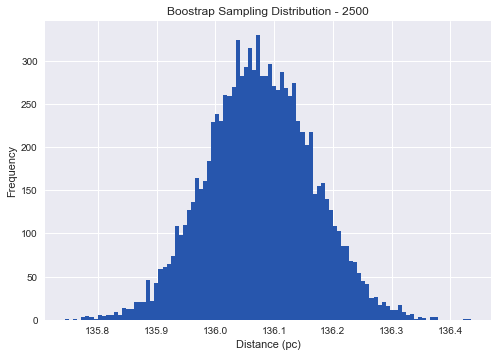

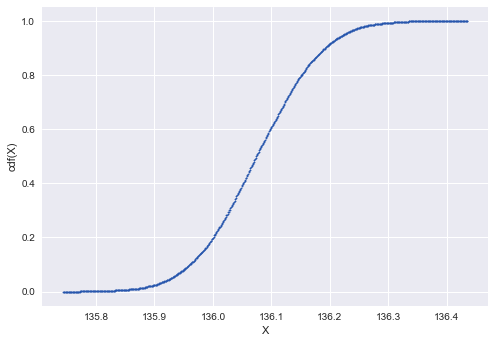

In [20]:
# Estimated distance to Hyades open cluster with 95% level of confidence (bootstrap resampling)
dist = list(1/(finalF['parallax']/1000)) + list(final1['dist'])
samp = len(dist) # sample size 
p_boot = []
for i in range(10000):
    index = [rand.randint(0,samp-1) for i in range(samp)]
    p_boot.append(np.mean([dist[i] for i in index]))
    
plt.hist(p_boot,bins = 100, color = (39/255, 86/255, 173/255))
plt.title('Boostrap Sampling Distribution - 2500')
plt.ylabel('Frequency')
plt.xlabel('Distance (pc)')
plt.show()

x = np.arange(round(min(p_boot),3),round(max(p_boot),3),.001)
cdf = []
for i in x:
    cdf.append(sum(x<i for x in p_boot)/len(p_boot))
plt.scatter(x, cdf, s=2, color=(39/255, 86/255, 173/255))
plt.xlabel('X')
plt.ylabel('cdf(X)')
plt.show()

lower = 0
upper = 0
for i in range(len(cdf)):
    if cdf[i] >= .049 and cdf[i] <= .051:
        lower = i
        break
for i in range(len(cdf)):
    if cdf[i] >= .949 and cdf[i] <= .951:
        upper = i
        break

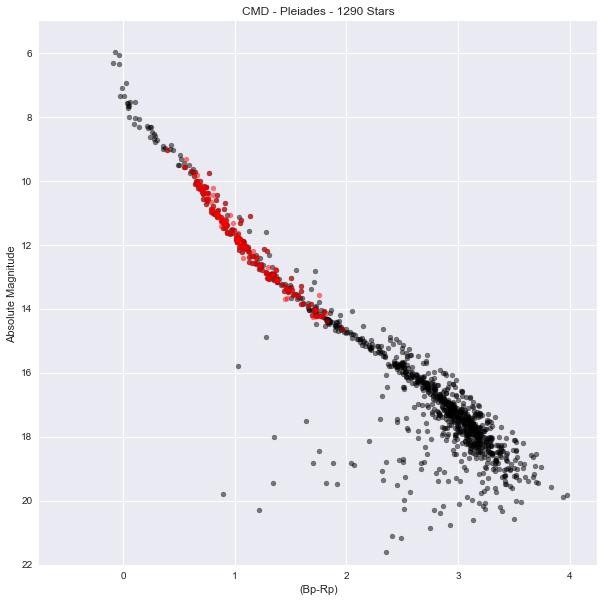

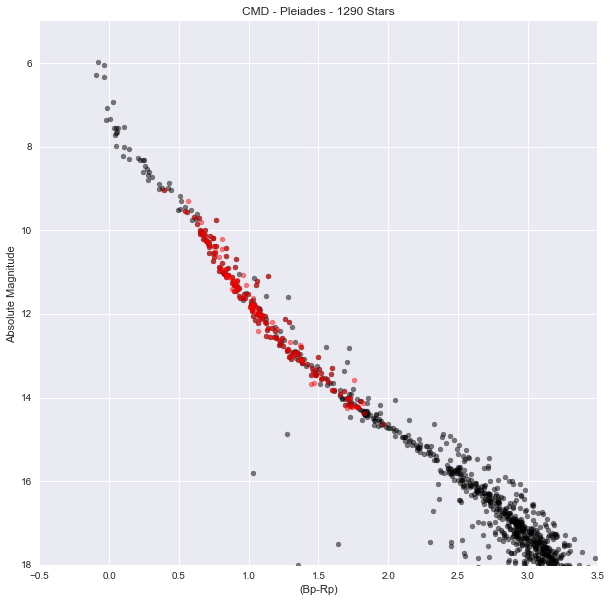

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,...,dist,dist_error,pm_scalar,pm_scalar_error,rad_v,rad_v_pc_yr,rad_v_error,finra,findec,findist
0,7.137700e+16,54.538800,0.094606,27.585798,0.054942,19.003866,0.155041,-43.454403,0.113519,6.713325,...,148.957480,9405.901447,0.047428,0.180620,5.950240,0.000006,3.808309,59.817652,15.515130,155.038834
1,6.861678e+16,54.542872,0.166720,25.192333,0.109733,19.521031,0.340113,-42.962878,0.236574,6.719652,...,148.817224,5345.346158,0.047190,0.387209,5.914762,0.000006,8.205405,59.965381,13.258201,154.862317
2,7.002436e+16,56.634724,0.296350,25.857031,0.130261,20.853875,0.579761,-46.933728,0.292848,6.725252,...,148.693308,3408.546706,0.051358,0.554785,6.431858,0.000007,10.802369,62.427467,12.819884,155.266893
3,7.004446e+16,56.542132,0.202944,26.002379,0.102059,19.343138,0.296991,-44.995572,0.216961,6.729610,...,148.597012,5064.750415,0.048977,0.328585,6.129698,0.000006,6.709016,61.915225,13.503609,154.861778
4,7.024103e+16,56.495101,0.252185,26.333698,0.165069,20.421485,0.399826,-43.863095,0.320114,6.736168,...,148.452365,3064.388679,0.048384,0.431850,6.049567,0.000006,8.925619,62.167735,14.149505,154.635234


In [21]:
M_g = [abs_mag(final1['phot_g_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
M_rp = [abs_mag(final1['phot_rp_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
M_b = [abs_mag(final1['phot_bp_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
color_index1 = color(M_rp,M_b)
plt.figure(figsize=(10,10))
plt.title('CMD - Pleiades - {} Stars'.format(len(final)+len(final1)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([-.75,4.25])
plt.ylim([22,5])
plt.legend(loc='upper left')
plt.scatter(color_index1, M_g,marker='o', s=25, alpha = .5,c = 'k')
plt.scatter(color_indexF, M_gF,marker='o', s=25, alpha = .5,c = 'r')
plt.style.use('seaborn')
plt.show()
final1.head()

plt.figure(figsize=(10,10))
plt.title('CMD - Pleiades - {} Stars'.format(len(final)+len(final1)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([-.5,3.5])
plt.ylim([18,5])
plt.legend(loc='upper left')
plt.scatter(color_index1, M_g,marker='o', s=25, alpha = .5,c = 'k')
plt.scatter(color_indexF, M_gF,marker='o', s=25, alpha = .5,c = 'r')
plt.style.use('seaborn')
plt.show()
final1.head()

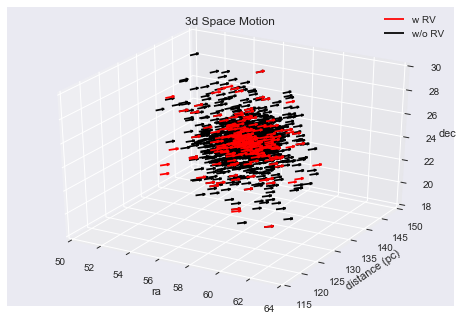

Total Pleiades Members: 1290
- (Gali 2016): 1210
Distance (Parsecs): (135.93, 136.22) 90% confidence
- (Gali 2016): 133 ± 5 pc
Center of Mass: (56.43 ra, 24.05 dec)
Point of Convergence: 80 ≤ ra ≤ 85 | -36 ≤ dec ≤ -34 

µ Radial Velocity - Spectroscopic : 5.7126 +- 0.0007 km/s^-1
µ Radial Velocity - Calculated rad_v: 5.6964 +- 0.0002 km/s^-1
µ Radial Velocity of Hyades Cluster: 5.5266 +- 0.0007 km/s^-1

Avg. Proper Motion: 0.0497 arc/yr +- error


In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(50,64)
ax.set_ylim3d(115, 150)
ax.set_zlim3d(18, 30)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')

start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
start1 = [finalF['ra'],finalF['dist'],finalF['dec']]
end1 = [finalF['finra'],finalF['findist'],finalF['findec']]

# ra = y, dist = x, dec = z
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True, color = 'r',label = 'w RV')
ax.quiver(start1[0], start1[1], start1[2], end1[0], end1[1], end1[2], length = 1, normalize = True, color ='k',label = 'w/o RV')
plt.legend()
plt.show()

print('Total Pleiades Members: {}'.format(len(final)+len(final1)))
print('- (Gali 2016): {}'.format(1210))
print('Distance (Parsecs): ({}, {}) 90% confidence'.format(np.round(x[lower],2),np.round(x[upper],2)))
print('- (Gali 2016): 133 ± 5 pc')
print('Center of Mass: ({} ra, {} dec)'.format(round((np.mean(final['ra'])+np.mean(finalF['ra']))/2,2),\
                                               round((np.mean(final['dec'])+np.mean(finalF['dec']))/2,2),2))
print('Point of Convergence: {} ≤ ra ≤ {} | {} ≤ dec ≤ {} '.format(POC[0],POC[1],POC[2],POC[3]))
print()

rv = final['radial_velocity']
rv1 = finalF['rad_v']

rv_error_astro = np.round(np.sqrt(sum([i**2 for i in final1['rad_v_error']]))\
                                        /(len(final1['rad_v_error'])**2),4)

rv_error_spec = np.round(np.sqrt(sum([i**2 for i in final['radial_velocity_error']]))\
                                        /(len(final['radial_velocity_error'])**2),4)

rv_avg_tot = np.round((sum(rv)+sum(rv1))/(len(final)+len(final1)),4)
rv_avg_error_tot = np.round(np.sqrt(rv_error_astro**2+rv_error_spec**2),4)

print('µ Radial Velocity - Spectroscopic : {} +- {} km/s^-1'.format(round(np.mean(final['radial_velocity']),4),\
     rv_error_spec))
print('µ Radial Velocity - Calculated rad_v: {} +- {} km/s^-1'\
      .format(np.round(np.mean(rv1),4),rv_error_astro))
print('µ Radial Velocity of Hyades Cluster: {} +- {} km/s^-1'.format(np.round(rv_avg_tot,4),rv_avg_error_tot,4))

print()
pm_avg = (sum(final['pm_scalar'])+sum(finalF['pm_scalar']))/(len(final)+len(finalF))

print('Avg. Proper Motion: {} arc/yr +- error'.format(round(pm_avg,4)))

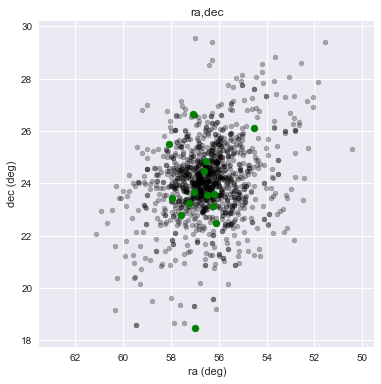

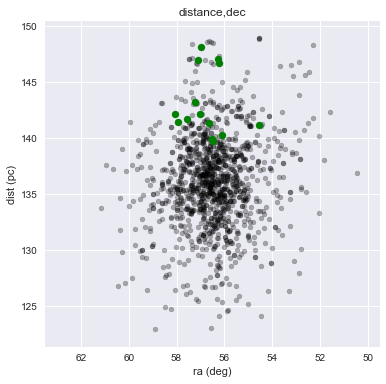

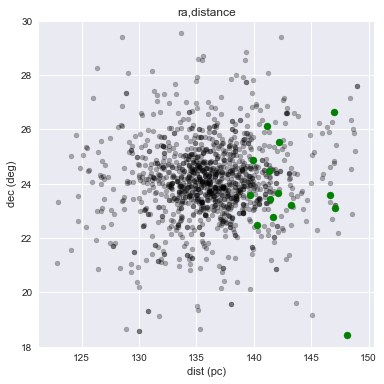

In [23]:
# Spatial Outlier Inspection

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.xlim([63.5,49.5])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('ra,dec')

for i in range(len(finalF)):
    plt.scatter(finalF['ra'][i],finalF['dec'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    plt.scatter(final['ra'][i],final['dec'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    if i in extremes:
        plt.scatter(final1['ra'][i],final1['dec'][i],s=50,alpha = 1, c = 'g')
plt.show()

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.xlim([63.5,49.5])
plt.ylabel('dist (pc)')
plt.xlabel('ra (deg)')
plt.title('distance,dec')

for i in range(len(finalF)):
    plt.scatter(finalF['ra'][i],finalF['dist'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    plt.scatter(final['ra'][i],final['dist'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    if i in extremes:
        plt.scatter(final1['ra'][i],final1['dist'][i],s=50,alpha = 1, c = 'g')
plt.show()
            
plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.ylim([18,30])
plt.ylabel('dec (deg)')
plt.xlabel('dist (pc)')
plt.title('ra,distance')

for i in range(len(finalF)):
    plt.scatter(finalF['dist'][i],finalF['dec'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    plt.scatter(final['dist'][i],final['dec'][i],s=25,alpha = .3, c = 'k')
for i in range(len(final)):
    if i in extremes:
        plt.scatter(final1['dist'][i],final1['dec'][i],s=50,alpha = 1, c = 'g')
plt.show()                             

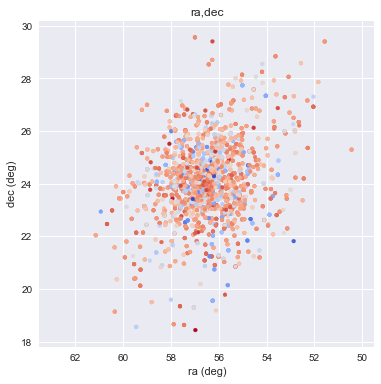

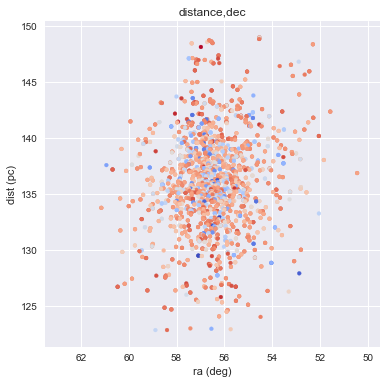

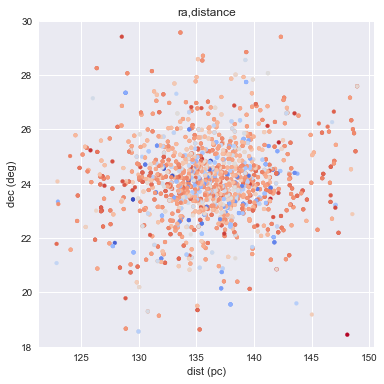

In [24]:
# Magnitude Inspection 

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.xlim([63.5,49.5])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('ra,dec')

M_g = [abs_mag(finalF['phot_g_mean_mag'][i],finalF['parallax'][i]) for i in range(len(finalF['ra']))]
plt.scatter(finalF['ra'], finalF['dec'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
plt.scatter(final['ra'], final['dec'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final1['phot_g_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
plt.scatter(final1['ra'], final1['dec'], c=M_g, s=15,cmap='coolwarm')
plt.show()

plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.xlim([63.5,49.5])
plt.ylabel('dist (pc)')
plt.xlabel('ra (deg)')
plt.title('distance,dec')

M_g = [abs_mag(finalF['phot_g_mean_mag'][i],finalF['parallax'][i]) for i in range(len(finalF['ra']))]
plt.scatter(finalF['ra'], finalF['dist'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
plt.scatter(final['ra'], final['dist'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final1['phot_g_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
plt.scatter(final1['ra'], final1['dist'], c=M_g, s=15,cmap='coolwarm')
plt.show()
            
plt.figure(figsize=(6,6))
plt.style.use('seaborn')
plt.ylim([18,30])
plt.ylabel('dec (deg)')
plt.xlabel('dist (pc)')
plt.title('ra,distance')

M_g = [abs_mag(finalF['phot_g_mean_mag'][i],finalF['parallax'][i]) for i in range(len(finalF['ra']))]
plt.scatter(finalF['dist'], finalF['dec'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
plt.scatter(final['dist'], final['dec'], c=M_g, s=15,cmap='coolwarm')
M_g = [abs_mag(final1['phot_g_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
plt.scatter(final1['dist'], final1['dec'], c=M_g, s=15,cmap='coolwarm')
plt.show()              